In [8]:
# Add Matplotlib inline magic command
%matplotlib inline

# Import dependencies
import pandas as pd
import matplotlib.pyplot as plt

In [9]:
# Import the data into Pandas DataFrame
city_data_to_load = "resources/city_data.csv"
ride_data_to_load = "resources/ride_data.csv"

city_df = pd.read_csv(city_data_to_load)
ride_df = pd.read_csv(ride_data_to_load)

In [30]:
# Get the columns and the rows that are not null
print(city_df.count())
# Get the data types of each column
print(" ")
print(city_df.dtypes)

city            120
driver_count    120
type            120
dtype: int64
 
city            object
driver_count     int64
type            object
dtype: object


18

In [31]:
# Get the columns and the rows that are not null
print(ride_df.count())
# Get the data types of each column
print(" ")
print(ride_df.dtypes)

city       2375
date       2375
fare       2375
ride_id    2375
dtype: int64
 
city        object
date        object
fare       float64
ride_id      int64
dtype: object


In [33]:
# Merge the data frames
city_ride_df = pd.merge(ride_df, city_df, on=["city", "city"], how="left")

# Display the DataFrame
city_ride_df.head()

,city,date,fare,ride_id,driver_count,type
0,Lake Jonathanshire,2019-01-14 10:14:22,13.83,5739410935873,5,Urban
1,South Michelleport,2019-03-04 18:24:09,30.24,2343912425577,72,Urban
2,Port Samanthamouth,2019-02-24 04:29:00,33.44,2005065760003,57,Urban
3,Rodneyfort,2019-02-10 23:22:03,23.44,5149245426178,34,Urban
4,South Jack,2019-03-06 04:28:35,34.58,3908451377344,46,Urban


In [38]:
# Create the Urban city DataFrame
urban_cities_df = city_ride_df.loc[city_ride_df["type"]=="Urban"]
# Create the Suburban city DataFrames
suburban_cities_df = city_ride_df.loc[city_ride_df["type"]=="Suburban"]
# Create the Rural city DataFrames
rural_cities_df = city_ride_df.loc[city_ride_df["type"]=="Rural"]

In [42]:
# Get the number of rides for each city in each city type
urban_ride_count = urban_cities_df.groupby(["city"]).count()["ride_id"]
suburban_ride_count = suburban_cities_df.groupby(["city"]).count()["ride_id"]
rural_ride_count = rural_cities_df.groupby(["city"]).count()["ride_id"]

In [44]:
# Get average fare for each city in each city type
urban_avg_fare = urban_cities_df.groupby(["city"]).mean()["fare"]
suburban_avg_fare = suburban_cities_df.groupby(["city"]).mean()["fare"]
rural_avg_fare = rural_cities_df.groupby(["city"]).mean()["fare"]

In [45]:
# Get the average number of drivers for each city in each city type
urban_driver_count = urban_cities_df.groupby(["city"]).mean()["driver_count"]
suburban_driver_count = suburban_cities_df.groupby(["city"]).mean()["driver_count"]
rural_driver_count = rural_cities_df.groupby(["city"]).mean()["driver_count"]

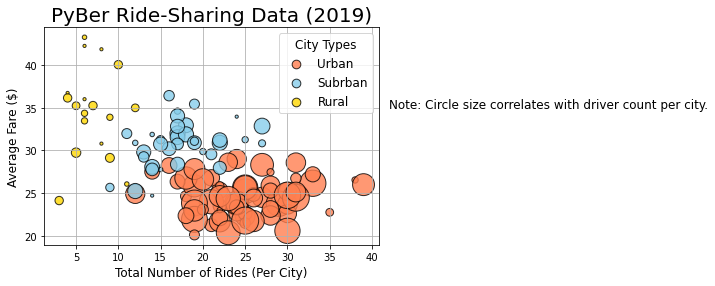

In [95]:
# Create a bubble chart for avg fares vs total rides
plt.scatter(urban_ride_count, urban_avg_fare, s=10*urban_driver_count, color="coral", label="Urban", linewidths=1, alpha=0.8, edgecolor="k")
plt.scatter(suburban_ride_count, suburban_avg_fare, s=10*suburban_driver_count, color="skyblue", label="Subrban", linewidths=1, alpha=0.8, edgecolor="k")
plt.scatter(rural_ride_count, rural_avg_fare, s=10*rural_driver_count, color="gold", label="Rural", linewidths=1, alpha=0.8, edgecolor="k")

# Format bubble size based on total drivers for each city type
plt.title("PyBer Ride-Sharing Data (2019)", fontsize="20")
plt.xlabel("Total Number of Rides (Per City)", fontsize="12")
plt.ylabel("Average Fare ($)", fontsize="12")
plt.grid(True)

# Create a legend
lgnd = plt.legend(fontsize="12", mode="Expanded", scatterpoints=1, loc="best", title="City Types")
lgnd.legendHandles[0]._sizes = [75]
lgnd.legendHandles[1]._sizes = [75]
lgnd.legendHandles[2]._sizes = [75]
lgnd.get_title().set_fontsize(12)


# Incorporate a text label about circle size
plt.text(42, 35, "Note: Circle size correlates with driver count per city.", fontsize="12")

# Save the figure.
plt.savefig("analysis/Fig1.png")

In [113]:
# Get summary statistics
import scipy.stats as sts
import numpy as np



The mean fare price for urban trips is $24.53.
The median fare price for urban trips is $24.64.
The mode fare price for urban trips is ModeResult(mode=array([22.86]), count=array([5])).
The mean fare price for urban trips is $30.97.
The median fare price for urban trips is $30.75.
The mode fare price for urban trips is ModeResult(mode=array([17.99]), count=array([3])).
The mean fare price for urban trips is $34.62.
The median fare price for urban trips is $37.05.
The mode fare price for urban trips is ModeResult(mode=array([37.05]), count=array([2])).


In [115]:
# Determine mean, median and mode for:
# The total number of ride for each city type
round(urban_ride_count.mean(),2), round(suburban_ride_count.mean(),2), round(rural_ride_count.mean(),2)
round(urban_ride_count.median(),2), round(suburban_ride_count.median(),2), round(rural_ride_count.median(),2)
round(urban_ride_count.mode(),2), round(suburban_ride_count.mode(),2), round(rural_ride_count.mode(),2)

# The average fares for each city type
# Get the fares for the urban cities.
urban_fares = urban_cities_df["fare"]
# Calculate the measures of central tendency for the average fare for the urban cities.
mean_urban_fares = np.mean(urban_fares)
print(f"The mean fare price for urban trips is ${mean_urban_fares:.2f}.")
median_urban_fares = np.median(urban_fares)
print(f"The median fare price for urban trips is ${median_urban_fares:.2f}.")
mode_urban_fares = sts.mode(urban_fares)
print(f"The mode fare price for urban trips is {mode_urban_fares}.")

# Get the fares for the suburban cities.
suburban_fares = suburban_cities_df["fare"]
# Calculate the measures of central tendency for the average fare for the urban cities.
mean_suburban_fares = np.mean(suburban_fares)
print(f"The mean fare price for urban trips is ${mean_suburban_fares:.2f}.")
median_suburban_fares = np.median(suburban_fares)
print(f"The median fare price for urban trips is ${median_suburban_fares:.2f}.")
mode_suburban_fares = sts.mode(suburban_fares)
print(f"The mode fare price for urban trips is {mode_suburban_fares}.")

# Get the fares for the rural cities.
rural_fares = rural_cities_df["fare"]
# Calculate the measures of central tendency for the average fare for the urban cities.
mean_rural_fares = np.mean(rural_fares)
print(f"The mean fare price for urban trips is ${mean_rural_fares:.2f}.")
median_rural_fares = np.median(rural_fares)
print(f"The median fare price for urban trips is ${median_rural_fares:.2f}.")
mode_rural_fares = sts.mode(rural_fares)
print(f"The mode fare price for urban trips is {mode_rural_fares}.")  

# The total number of drivers for each city type
# Get the driver count data from the urban cities.
urban_drivers = urban_cities_df['driver_count']
suburban_drivers = suburban_cities_df['driver_count']
rural_drivers = rural_cities_df['driver_count']

The mean fare price for urban trips is $24.53.
The median fare price for urban trips is $24.64.
The mode fare price for urban trips is ModeResult(mode=array([22.86]), count=array([5])).
The mean fare price for urban trips is $30.97.
The median fare price for urban trips is $30.75.
The mode fare price for urban trips is ModeResult(mode=array([17.99]), count=array([3])).
The mean fare price for urban trips is $34.62.
The median fare price for urban trips is $37.05.
The mode fare price for urban trips is ModeResult(mode=array([37.05]), count=array([2])).


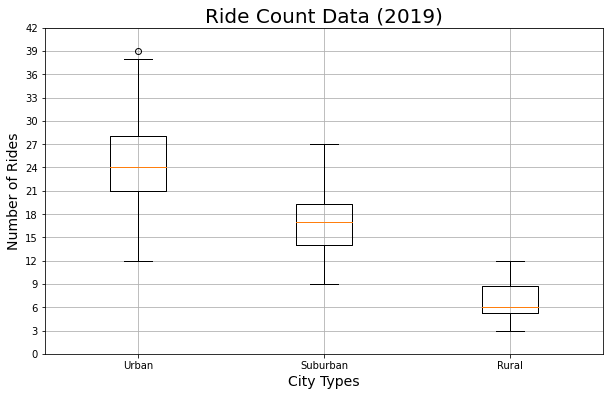

West Angela has the highest rider count.


In [126]:
# Create box-and-whisker plots to determine any outliers for:
# The number of rides for each city type
x_labels = ["Urban", "Suburban","Rural"]
ride_count_data = [urban_ride_count, suburban_ride_count, rural_ride_count]
fig, ax = plt.subplots(figsize=(10, 6))
ax.set_title('Ride Count Data (2019)',fontsize=20)
ax.set_ylabel('Number of Rides',fontsize=14)
ax.set_xlabel("City Types",fontsize=14)
ax.boxplot(ride_count_data, labels=x_labels)
ax.set_yticks(np.arange(0, 45, step=3.0))
ax.grid()
# Save the figure.
plt.savefig("analysis/Fig2.png")
plt.show()

# Determine the outlier as shown in urban cities
# Get the city that matches 39.
urban_city_outlier = urban_ride_count[urban_ride_count==39].index[0]
print(f"{urban_city_outlier} has the highest rider count.")


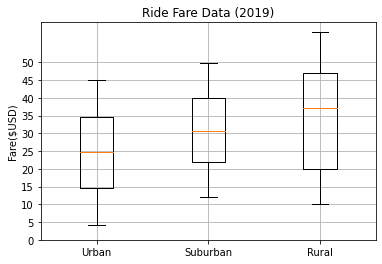

<Figure size 432x288 with 0 Axes>

In [127]:
# The fares for each city type
# Create a box-and-whisker plot for the urban fare data.
x_labels = ["Urban", "Suburban","Rural"]
ride_fare_data = [urban_fares, suburban_fares, rural_fares]
fig, ax = plt.subplots()
ax.boxplot(ride_fare_data, labels=x_labels)
# Add the title, y-axis label and grid.
ax.set_title('Ride Fare Data (2019)')
ax.set_ylabel('Fare($USD)')
ax.set_yticks(np.arange(0, 51, step=5.0))
ax.grid()
plt.show()

# Save the figure.
plt.savefig("analysis/Fig3.png")
plt.show()

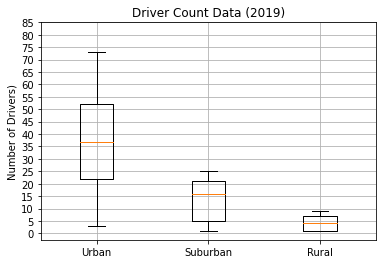

<Figure size 432x288 with 0 Axes>

In [128]:
# The number of drivers for each city type
# Create the box-and-whisker plot for the urban driver count data.
x_labels = ["Urban", "Suburban","Rural"]
driver_count_data = [urban_drivers, suburban_drivers, rural_drivers]
fig, ax = plt.subplots()
ax.boxplot(driver_count_data, labels=x_labels)
# Add the title, y-axis label and grid.
ax.set_title('Driver Count Data (2019)')
ax.set_ylabel('Number of Drivers)')
ax.set_yticks(np.arange(0, 90, step=5.0))
ax.grid()
plt.show()

# Save the figure.
plt.savefig("analysis/Fig4.png")
plt.show()

In [136]:
# Create a pie chart for the percent of total fares, rides, and drivers
# Get the sum of the fares for each city type.
sum_fares_by_type = city_ride_df.groupby(["type"]).sum()["fare"]

# Get the sum of all the fares.
total_fares = city_ride_df["fare"].sum()

# Calculate the percentage of fare for each city type.
type_percents = 100 * sum_fares_by_type / total_fares

# Calculate the percentage of fare for each city type.
type_percents = 100 * city_ride_df.groupby(["type"]).sum()["fare"] / city_ride_df["fare"].sum()

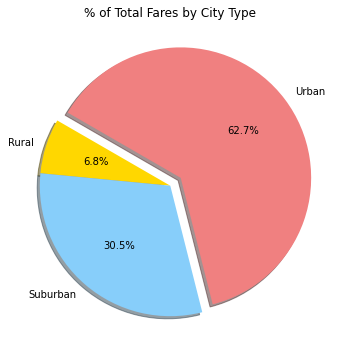

In [141]:
# Import mpl to change the plot configurations using rcParams.
import matplotlib as mpl

# Build the percentage of fares by city type pie chart.
plt.subplots(figsize=(10, 6))
plt.pie(type_percents,
    labels=["Rural", "Suburban", "Urban"],
    colors=["gold", "lightskyblue", "lightcoral"],
    explode=[0, 0, 0.1],
    autopct='%1.1f%%',
    shadow=True, startangle=150)
plt.title("% of Total Fares by City Type")

# Change the default font size from 10 to 14.
mpl.rcParams['font.size'] = 14

# Save Figure
plt.savefig("analysis/Fig5.png")
# Show Figure
plt.show()

In [143]:
# Calculate the percentage of rides for each city type.
ride_percents = 100 * city_ride_df.groupby(["type"]).count()["ride_id"] / city_ride_df["ride_id"].count()
ride_percents

type
Rural        5.263158
Suburban    26.315789
Urban       68.421053
Name: ride_id, dtype: float64

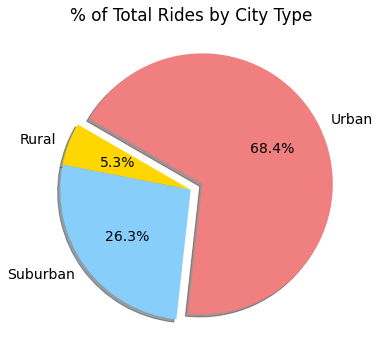

In [144]:
# Build percentage of rides by city type pie chart.
plt.subplots(figsize=(10, 6))
plt.pie(ride_percents,
    labels=["Rural", "Suburban", "Urban"],
    colors=["gold", "lightskyblue", "lightcoral"],
    explode=[0, 0, 0.1],
    autopct='%1.1f%%',
    shadow=True, startangle=150)
plt.title("% of Total Rides by City Type")
# Change the default font size from 10 to 14.
mpl.rcParams['font.size'] = 14
# Save Figure
plt.savefig("analysis/Fig6.png")
# Show Figure
plt.show()